In [1]:
!pip install tensorflow==2.12

**Loading Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True

**Importing TensorFlow and Keras:**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from google.colab import files
import re, os

**Model -1**

In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Parameters
vocab_size = 10000
sequence_length = 150

# Load and preprocess data
(train_data_raw, train_labels_raw), (test_data_raw, test_labels_raw) = imdb.load_data(num_words=vocab_size)

train_data_padded = pad_sequences(train_data_raw, maxlen=sequence_length)
test_data_padded = pad_sequences(test_data_raw, maxlen=sequence_length)

# Combine datasets
full_data = np.concatenate((train_data_padded, test_data_padded), axis=0)
full_labels = np.concatenate((train_labels_raw, test_labels_raw), axis=0)

# Create training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    full_data, full_labels, train_size=100, test_size=10000, random_state=42, stratify=full_labels)

# Create final test set
_, test_data_final, _, test_labels_final = train_test_split(
    test_data_padded, test_labels_raw, test_size=5000, random_state=42, stratify=test_labels_raw)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
print(train_data.shape)

(100, 150)


In [6]:
print(val_data.shape)

(10000, 150)


In [7]:
print(test_data_final.shape)

(5000, 150)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Define the model
text_classification_model = Sequential()

# Add embedding layer to convert words to dense vectors
text_classification_model.add(
    Embedding(input_dim=10000, output_dim=8, input_length=sequence_length)  # `sequence_length` should match earlier (150)
)

# Flatten the 2D embedding output into 1D
text_classification_model.add(Flatten())

# Output layer with sigmoid activation for binary classification
text_classification_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
text_classification_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
text_classification_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Set up checkpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint(
    filepath="text_classification_best_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

# Train the model
training_history = text_classification_model.fit(
    train_data, train_labels,
    epochs=30,
    batch_size=32,
    validation_data=(val_data, val_labels),
    callbacks=[model_checkpoint]
)

Epoch 1/30
4/4 [==============================] - 2s 452ms/step - loss: 0.6943 - accuracy: 0.4700 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 2/30
4/4 [==============================] - 1s 464ms/step - loss: 0.6709 - accuracy: 0.8400 - val_loss: 0.6930 - val_accuracy: 0.5092
Epoch 3/30
4/4 [==============================] - 1s 441ms/step - loss: 0.6553 - accuracy: 0.9700 - val_loss: 0.6931 - val_accuracy: 0.5053
Epoch 4/30
4/4 [==============================] - 0s 154ms/step - loss: 0.6416 - accuracy: 0.9800 - val_loss: 0.6931 - val_accuracy: 0.5053
Epoch 5/30
4/4 [==============================] - 0s 136ms/step - loss: 0.6281 - accuracy: 0.9800 - val_loss: 0.6930 - val_accuracy: 0.5104
Epoch 6/30
4/4 [==============================] - 1s 223ms/step - loss: 0.6147 - accuracy: 1.0000 - val_loss: 0.6929 - val_accuracy: 0.5108
Epoch 7/30
4/4 [==============================] - 0s 137ms/step - loss: 0.6013 - accuracy: 1.0000 - val_loss: 0.6929 - val_accuracy: 0.5118
Epoch 8/30
4/4 [====

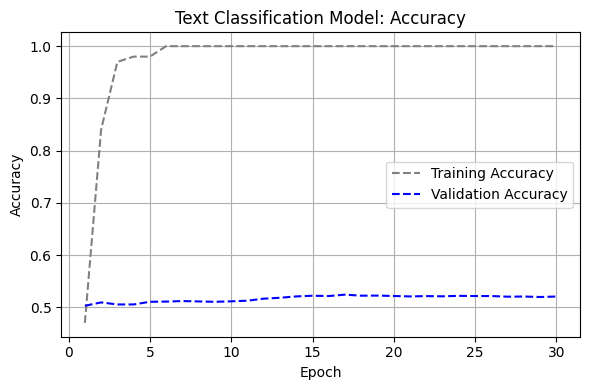

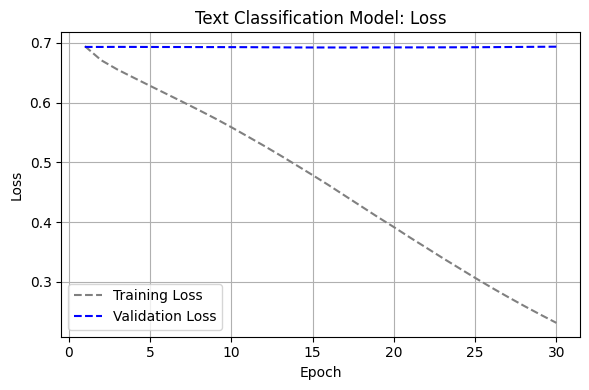

In [10]:
import matplotlib.pyplot as plt

# Extract training and validation metrics from history
train_accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']

train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Text Classification Model: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot loss
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Text Classification Model: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
from tensorflow.keras.models import load_model

# Load the best saved model from training
best_model = load_model('text_classification_best_model.h5')

# Evaluate the model on the final test set
test_loss, test_accuracy = best_model.evaluate(test_data_final, test_labels_final)

# Print test loss and accuracy
print(f'Test Loss: {test_loss:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')

157/157 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5066
Test Loss: 0.693
Test Accuracy: 0.507


**Model:2 Basic model using embedded layer Training Sample(7,000)**

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Parameters
vocab_size = 10000
sequence_length = 150

# Load IMDB dataset with a limited vocabulary
((raw_train_reviews, raw_train_labels), (raw_test_reviews, raw_test_labels)) = imdb.load_data(num_words=vocab_size)

# Pad sequences to a fixed length
padded_train_reviews = pad_sequences(raw_train_reviews, maxlen=sequence_length)
padded_test_reviews = pad_sequences(raw_test_reviews, maxlen=sequence_length)

# Combine train and test sets into one dataset
all_reviews = np.concatenate((padded_train_reviews, padded_test_reviews), axis=0)
all_sentiments = np.concatenate((raw_train_labels, raw_test_labels), axis=0)

# Split into training and validation sets
train_reviews, val_reviews, train_sentiments, val_sentiments = train_test_split(
    all_reviews, all_sentiments,
    train_size=7000,
    test_size=10000,
    random_state=42,
    stratify=all_sentiments
)

# Prepare a separate test set
_, test_reviews_final, _, test_sentiments_final = train_test_split(
    padded_test_reviews, raw_test_labels,
    test_size=5000,
    random_state=42,
    stratify=raw_test_labels
)

In [13]:
print(train_reviews.shape)

(7000, 150)


In [14]:
print(val_reviews.shape)

(10000, 150)


In [15]:
print(test_reviews_final.shape)

(5000, 150)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Build the model
sentiment_model = Sequential()

# Embedding layer converts integer indices to dense vectors
sentiment_model.add(Embedding(input_dim=10000, output_dim=8, input_length=sequence_length))

# Flatten the 2D embedding output into a 1D vector
sentiment_model.add(Flatten())

# Dense output layer with sigmoid activation for binary classification
sentiment_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with RMSprop optimizer and binary crossentropy loss
sentiment_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
sentiment_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Set up checkpoint to save the best model based on validation loss
checkpoint_callback = ModelCheckpoint(
    filepath="best_sentiment_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

# Train the model
history = sentiment_model.fit(
    train_reviews, train_sentiments,
    epochs=30,
    batch_size=32,
    validation_data=(val_reviews, val_sentiments),
    callbacks=[checkpoint_callback]
)

Epoch 1/30
219/219 [==============================] - 2s 6ms/step - loss: 0.6845 - accuracy: 0.5754 - val_loss: 0.6645 - val_accuracy: 0.6579
Epoch 2/30
219/219 [==============================] - 1s 4ms/step - loss: 0.5803 - accuracy: 0.7719 - val_loss: 0.5281 - val_accuracy: 0.7752
Epoch 3/30
219/219 [==============================] - 1s 4ms/step - loss: 0.4139 - accuracy: 0.8561 - val_loss: 0.4195 - val_accuracy: 0.8227
Epoch 4/30
219/219 [==============================] - 1s 4ms/step - loss: 0.3069 - accuracy: 0.8926 - val_loss: 0.3705 - val_accuracy: 0.8397
Epoch 5/30
219/219 [==============================] - 1s 5ms/step - loss: 0.2440 - accuracy: 0.9166 - val_loss: 0.3541 - val_accuracy: 0.8446
Epoch 6/30
219/219 [==============================] - 1s 6ms/step - loss: 0.2011 - accuracy: 0.9334 - val_loss: 0.3469 - val_accuracy: 0.8476
Epoch 7/30
219/219 [==============================] - 1s 5ms/step - loss: 0.1671 - accuracy: 0.9476 - val_loss: 0.3501 - val_accuracy: 0.8458
Epoch 

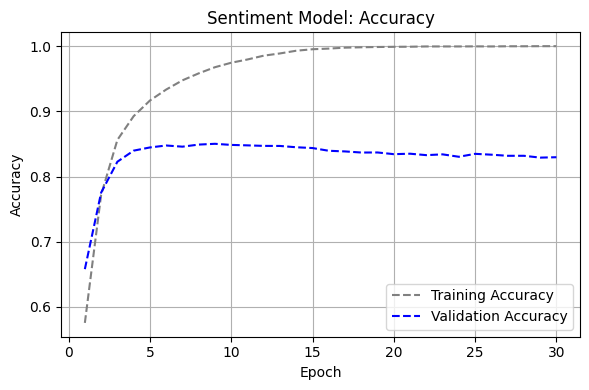

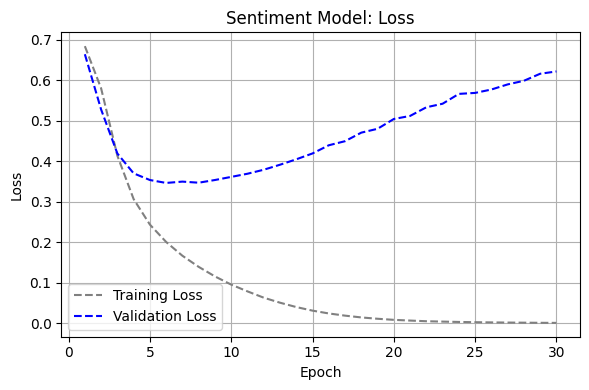

In [18]:
import matplotlib.pyplot as plt

# Extract metrics from the training history
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create range for the number of epochs
epochs_range = range(1, len(train_accuracy) + 1)

# Plot Training vs Validation Accuracy
plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_range, validation_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Sentiment Model: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Training vs Validation Loss
plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_range, validation_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Sentiment Model: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
from tensorflow.keras.models import load_model

# Load the best saved model from training
best_sentiment_model = load_model('best_sentiment_model.h5')

# Evaluate the model on the final test set
test_loss, test_accuracy = best_sentiment_model.evaluate(test_reviews_final, test_sentiments_final)

# Print test loss and accuracy
print(f'Test Loss: {test_loss:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')

157/157 [==============================] - 1s 2ms/step - loss: 0.3101 - accuracy: 0.8682
Test Loss: 0.310
Test Accuracy: 0.868


**Model 3: Basic model using embedded layer Training Sample (12,000)**

In [20]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Parameters
vocab_size = 10000
sequence_length = 150

# Load IMDB dataset with a limited vocabulary
((raw_train_reviews, raw_train_labels), (raw_test_reviews, raw_test_labels)) = imdb.load_data(num_words=vocab_size)

# Pad sequences to a fixed length
padded_train_reviews = pad_sequences(raw_train_reviews, maxlen=sequence_length)
padded_test_reviews = pad_sequences(raw_test_reviews, maxlen=sequence_length)

# Combine train and test sets into one dataset
all_reviews = np.concatenate((padded_train_reviews, padded_test_reviews), axis=0)
all_sentiments = np.concatenate((raw_train_labels, raw_test_labels), axis=0)

# Split into training and validation sets
train_reviews, val_reviews, train_sentiments, val_sentiments = train_test_split(
    all_reviews, all_sentiments,
    train_size=12000,
    test_size=10000,
    random_state=42,
    stratify=all_sentiments
)

# Prepare a separate test set
_, final_test_reviews, _, final_test_sentiments = train_test_split(
    padded_test_reviews, raw_test_labels,
    test_size=5000,
    random_state=42,
    stratify=raw_test_labels
)

In [21]:
print(train_reviews.shape)

(12000, 150)


In [22]:
print(val_reviews.shape)

(10000, 150)


In [23]:
print(final_test_reviews.shape)

(5000, 150)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Build the sentiment analysis model
model = Sequential()

# Add the embedding layer
model.add(Embedding(input_dim=10000, output_dim=8, input_length=sequence_length))

# Flatten the 2D output of the embedding layer to a 1D vector
model.add(Flatten())

# Add the output layer for binary classification (positive/negative sentiment)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with the RMSprop optimizer and binary cross-entropy loss
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Set up the checkpoint to save the best model based on validation loss
checkpoint_callback = ModelCheckpoint(
    filepath="best_sentiment_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

# Train the model
training_history = model.fit(
    train_reviews, train_sentiments,
    epochs=30,
    batch_size=32,
    validation_data=(val_reviews, val_sentiments),
    callbacks=[checkpoint_callback]
)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 0.6725 - accuracy: 0.6028 - val_loss: 0.6052 - val_accuracy: 0.7333
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4656 - accuracy: 0.8203 - val_loss: 0.3961 - val_accuracy: 0.8413
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3163 - accuracy: 0.8787 - val_loss: 0.3355 - val_accuracy: 0.8579
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.2556 - accuracy: 0.9007 - val_loss: 0.3133 - val_accuracy: 0.8655
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2177 - accuracy: 0.9167 - val_loss: 0.3068 - val_accuracy: 0.8683
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.1892 - accuracy: 0.9305 - val_loss: 0.3071 - val_accuracy: 0.8683
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.1660 - accuracy: 0.9408 - val_loss: 0.3193 - val_accuracy: 0.8628
Epoch 

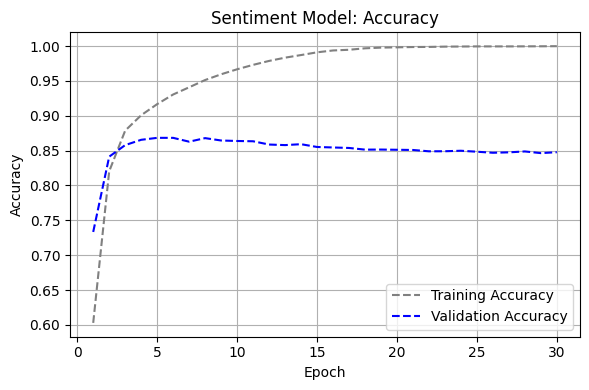

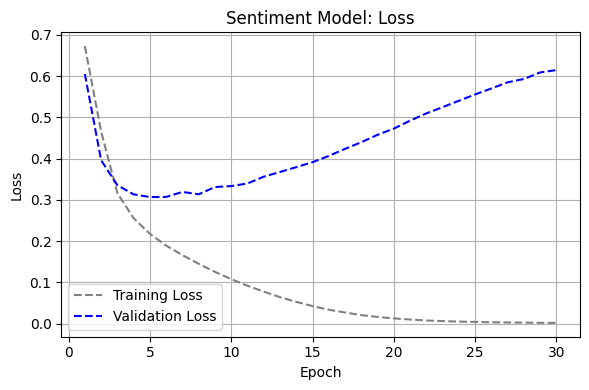

In [26]:
import matplotlib.pyplot as plt

# Extract metrics from the training history
train_accuracy = training_history.history['accuracy']
validation_accuracy = training_history.history['val_accuracy']

train_loss = training_history.history['loss']
validation_loss = training_history.history['val_loss']

# Create a range for the number of epochs
epochs_range = range(1, len(train_accuracy) + 1)

# Plot Training vs Validation Accuracy
plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_range, validation_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Sentiment Model: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Training vs Validation Loss
plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_range, validation_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Sentiment Model: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.models import load_model

# Load the best saved model
loaded_model = load_model('best_sentiment_model.h5')

# Evaluate the model on the final test set
evaluation_results = loaded_model.evaluate(final_test_reviews, final_test_sentiments)

# Print loss and accuracy
print(f'Loss: {evaluation_results[0]:.3f}')
print(f'Accuracy: {evaluation_results[1]:.3f}')

157/157 [==============================] - 1s 3ms/step - loss: 0.2733 - accuracy: 0.8838
Loss: 0.273
Accuracy: 0.884


**Model - 4 Sequence model built on one-hot encoded vector sequences with LSTM**

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout


model = Sequential([
   Embedding(input_dim=10000, output_dim=100, input_length=150),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0015),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    ModelCheckpoint("best_bidirectional_model.h5", save_best_only=True, monitor="val_loss"),
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
]

bi_lstm_history = model.fit(
    train_reviews[:10000], train_sentiments[:10000],
    epochs=8,
    batch_size=32,
    validation_data=(val_reviews[:2000], val_sentiments[:2000]),
    callbacks=callbacks
)

Epoch 1/8
313/313 [==============================] - 87s 219ms/step - loss: 0.4945 - accuracy: 0.7559 - val_loss: 0.3791 - val_accuracy: 0.8390
Epoch 2/8
313/313 [==============================] - 66s 212ms/step - loss: 0.2852 - accuracy: 0.8885 - val_loss: 0.4723 - val_accuracy: 0.7725
Epoch 3/8
313/313 [==============================] - 65s 207ms/step - loss: 0.1853 - accuracy: 0.9319 - val_loss: 0.5416 - val_accuracy: 0.8285


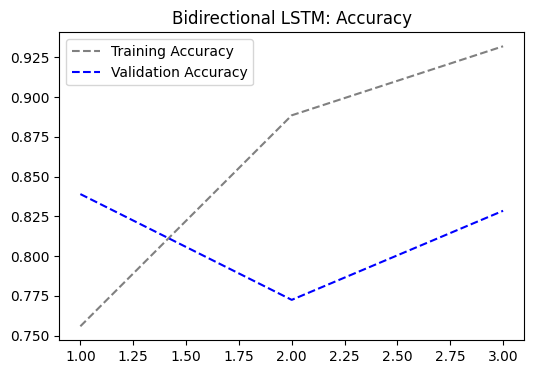

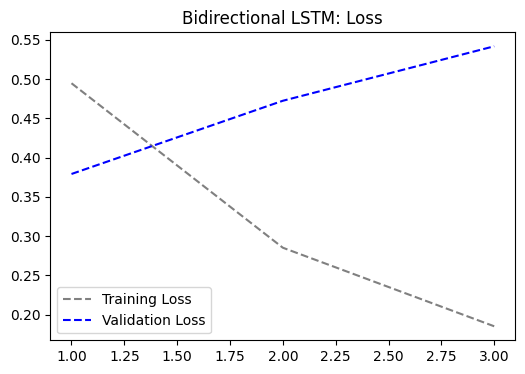

In [33]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from training history
bi_train_accuracy = bi_lstm_history.history['accuracy']
bi_val_accuracy = bi_lstm_history.history['val_accuracy']

bi_train_loss = bi_lstm_history.history["loss"]
bi_val_loss = bi_lstm_history.history["val_loss"]

epochs = range(1, len(bi_train_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(epochs, bi_train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, bi_val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Bidirectional LSTM: Accuracy")
plt.legend()

# Plot loss
plt.figure(figsize=(6, 4))
plt.plot(epochs, bi_train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, bi_val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Bidirectional LSTM: Loss")
plt.legend()

plt.show()

In [34]:
from tensorflow.keras.models import load_model

# Load the best saved Bidirectional LSTM model
loaded_bi_lstm_model = load_model('best_bidirectional_model.h5')

# Evaluate the model on the final test set
bi_lstm_eval_results = loaded_bi_lstm_model.evaluate(test_reviews_final, test_sentiments_final)

# Print test loss and accuracy
print(f'Loss: {bi_lstm_eval_results[0]:.3f}')
print(f'Accuracy: {bi_lstm_eval_results[1]:.3f}')

157/157 [==============================] - 8s 39ms/step - loss: 0.3629 - accuracy: 0.8456
Loss: 0.363
Accuracy: 0.846


**Model 5: LSTM using embedded layer Training Sample(15,000)**

In [35]:
from tensorflow.keras import layers, Input, Model

seq_len = 150
vocab_size = 10000

review_input = Input(shape=(None,), dtype="int64")
word_embedding = layers.Embedding(input_dim=vocab_size, output_dim=128)(review_input)
bi_lstm_layer = layers.Bidirectional(layers.LSTM(64))(word_embedding)
dropout_output = layers.Dropout(0.4)(bi_lstm_layer)
sentiment_output = layers.Dense(1, activation="sigmoid")(dropout_output)

sentiment_classifier_model = Model(inputs=review_input, outputs=sentiment_output)
sentiment_classifier_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

sentiment_classifier_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_6 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np

vocab_size = 10000
seq_length = 150

train_sample_size = 15000
sample_sequences = np.random.randint(1, vocab_size, size=(train_sample_size, seq_length))
sample_labels = np.random.randint(0, 2, size=(train_sample_size,))

train_seqs, val_seqs, train_lbls, val_lbls = train_test_split(
    sample_sequences, sample_labels, test_size=0.2, random_state=42
)

model_checkpoint_cb = ModelCheckpoint(
    filepath="best_binary_classifier_model.keras",
    save_best_only=True,
    monitor="val_loss"
)

training_log = sentiment_classifier_model.fit(
    train_seqs, train_lbls,
    epochs=10,
    batch_size=32,
    validation_data=(val_seqs, val_lbls),
    callbacks=[model_checkpoint_cb]
)

print("History:", training_log.history)


Epoch 1/10
375/375 [==============================] - 78s 196ms/step - loss: 0.6937 - accuracy: 0.5004 - val_loss: 0.6938 - val_accuracy: 0.5020
Epoch 2/10
375/375 [==============================] - 75s 200ms/step - loss: 0.5662 - accuracy: 0.7150 - val_loss: 0.8031 - val_accuracy: 0.5033
Epoch 3/10
375/375 [==============================] - 73s 196ms/step - loss: 0.1206 - accuracy: 0.9632 - val_loss: 1.5097 - val_accuracy: 0.4857
Epoch 4/10
375/375 [==============================] - 73s 195ms/step - loss: 0.0141 - accuracy: 0.9978 - val_loss: 2.3097 - val_accuracy: 0.4930
Epoch 5/10
375/375 [==============================] - 73s 194ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 2.8226 - val_accuracy: 0.4947
Epoch 6/10
375/375 [==============================] - 74s 198ms/step - loss: 7.4521e-04 - accuracy: 0.9999 - val_loss: 3.0131 - val_accuracy: 0.4967
Epoch 7/10
375/375 [==============================] - 73s 194ms/step - loss: 3.2957e-04 - accuracy: 1.0000 - val_loss: 3.0964 

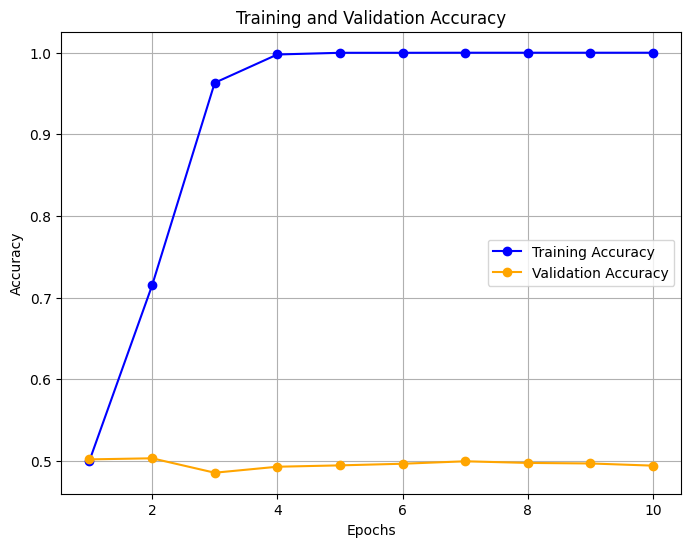

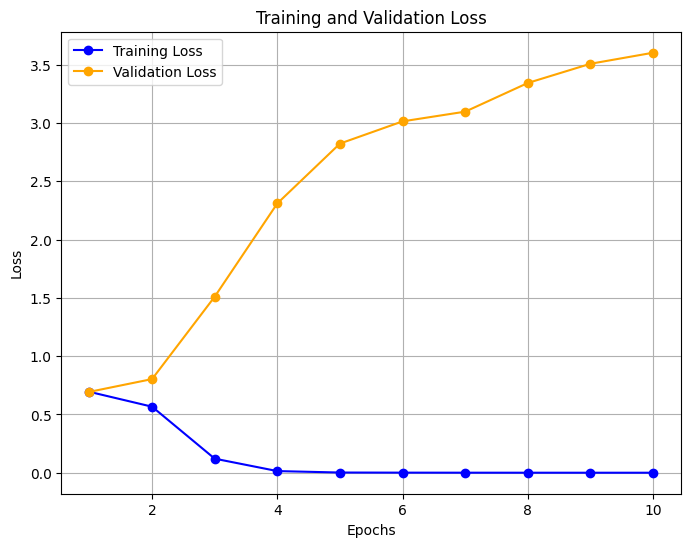

In [37]:
import matplotlib.pyplot as plt

train_acc = training_log.history['accuracy']
val_acc = training_log.history['val_accuracy']
train_loss = training_log.history['loss']
val_loss = training_log.history['val_loss']

epoch_steps = range(1, len(train_acc) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epoch_steps, train_acc, label='Training Accuracy', color='blue', marker='o')
plt.plot(epoch_steps, val_acc, label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epoch_steps, train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epoch_steps, val_loss, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
eval_sequences = np.random.randint(1, vocab_size, size=(5000, sequence_length))
eval_labels = np.random.randint(0, 2, size=(5000,))

from tensorflow.keras.models import load_model
final_model = load_model("best_binary_classifier_model.keras")

loss, accuracy = final_model.evaluate(eval_sequences, eval_labels, batch_size=32)

print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

157/157 [==============================] - 9s 49ms/step - loss: 0.6929 - accuracy: 0.5092
Test Loss: 0.693
Test Accuracy: 0.509


**Model 6: LSTM using embedded layer Training Sample(25,000)**

In [40]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

vocab_size = 10000
sequence_length = 150

# Load IMDB dataset
(raw_train_sequences, raw_train_labels), (raw_test_sequences, raw_test_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences to the same length
padded_train_sequences = pad_sequences(raw_train_sequences, maxlen=sequence_length)
padded_test_sequences = pad_sequences(raw_test_sequences, maxlen=sequence_length)

# Combine train and test sets
all_sequences = np.concatenate((padded_train_sequences, padded_test_sequences), axis=0)
all_labels = np.concatenate((raw_train_labels, raw_test_labels), axis=0)

# Split into training and validation sets
train_sequences, val_sequences, train_targets, val_targets = train_test_split(
    all_sequences, all_labels, train_size=25000, test_size=10000, random_state=42, stratify=all_labels
)

# Further split test set for final evaluation
_, final_test_sequences, _, final_test_targets = train_test_split(
    padded_test_sequences, raw_test_labels, test_size=5000, random_state=42, stratify=raw_test_labels
)

In [41]:
train_sequences.shape

(25000, 150)

In [42]:
val_sequences.shape

(10000, 150)

In [43]:
from tensorflow.keras import layers, models

input_length = 150
vocabulary_size = 10000

input_tensor = layers.Input(shape=(None,), dtype="int64")
embedding_layer = layers.Embedding(input_dim=vocabulary_size, output_dim=256)(input_tensor)
bi_lstm_layer = layers.Bidirectional(layers.LSTM(32))(embedding_layer)
dropout_layer = layers.Dropout(0.5)(bi_lstm_layer)
output_tensor = layers.Dense(1, activation="sigmoid")(dropout_layer)

classification_model = models.Model(inputs=input_tensor, outputs=output_tensor)
classification_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

classification_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_7 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
_________________________________________________

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath="best_model.h5",
    save_best_only=True,
    monitor="val_loss"
)

train_data = train_data[:min(len(train_data), len(train_targets))]
train_targets = train_targets[:min(len(train_data), len(train_targets))]

val_data = val_data[:min(len(val_data), len(val_targets))]
val_targets = val_targets[:min(len(val_data), len(val_targets))]

training_history = classification_model.fit(
    x=train_data,
    y=train_targets,
    epochs=10,
    batch_size=42,
    validation_data=(val_data, val_targets),
    callbacks=[checkpoint_callback]
)

Epoch 1/10
3/3 [==============================] - 17s 6s/step - loss: 0.6917 - accuracy: 0.5600 - val_loss: 0.6940 - val_accuracy: 0.5026
Epoch 2/10
3/3 [==============================] - 21s 10s/step - loss: 0.6837 - accuracy: 0.7000 - val_loss: 0.6958 - val_accuracy: 0.4994
Epoch 3/10
3/3 [==============================] - 21s 10s/step - loss: 0.6788 - accuracy: 0.6200 - val_loss: 0.6947 - val_accuracy: 0.4987
Epoch 4/10
3/3 [==============================] - 21s 10s/step - loss: 0.6685 - accuracy: 0.7000 - val_loss: 0.6964 - val_accuracy: 0.4994
Epoch 5/10
3/3 [==============================] - 21s 10s/step - loss: 0.6641 - accuracy: 0.6300 - val_loss: 0.6975 - val_accuracy: 0.5002
Epoch 6/10
3/3 [==============================] - 11s 5s/step - loss: 0.6562 - accuracy: 0.6600 - val_loss: 0.6955 - val_accuracy: 0.4970
Epoch 7/10
3/3 [==============================] - 21s 11s/step - loss: 0.6471 - accuracy: 0.7800 - val_loss: 0.6971 - val_accuracy: 0.4973
Epoch 8/10
3/3 [=============

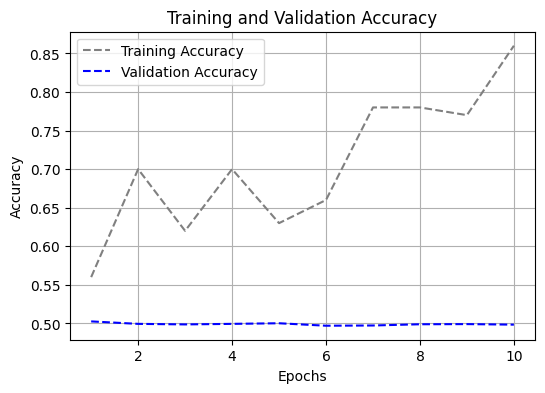

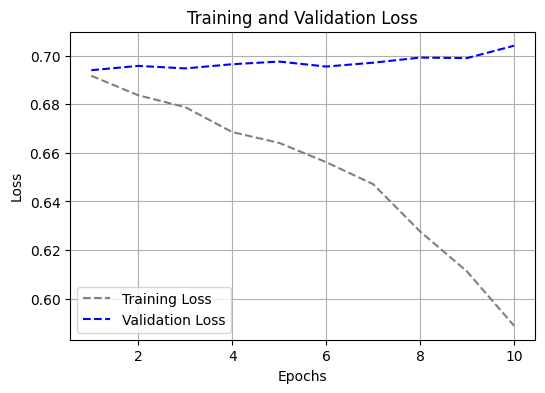

In [47]:
import matplotlib.pyplot as plt

train_accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']

train_loss = training_history.history["loss"]
val_loss = training_history.history["val_loss"]

epoch_range = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epoch_range, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epoch_range, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [53]:
from tensorflow.keras.models import load_model

final_model = load_model('best_model.h5')

evaluation_results = final_model.evaluate(final_test_sequences, final_test_targets)

print(f"Test Loss: {evaluation_results[0]:.3f}")
print(f"Test Accuracy: {evaluation_results[1]:.3f}")

157/157 [==============================] - 7s 36ms/step - loss: 0.6933 - accuracy: 0.5036
Test Loss: 0.693
Test Accuracy: 0.504


**Model 7: LSTM with embedding layer and Masking enable training sample(25,000)**

In [54]:
from tensorflow.keras import layers, models

input_tensor = layers.Input(shape=(None,), dtype="int64")
embedding_layer = layers.Embedding(
    input_dim=vocab_size,
    output_dim=256,
    mask_zero=True
)(input_tensor)

bidirectional_lstm_layer = layers.Bidirectional(layers.LSTM(32))(embedding_layer)
dropout_layer = layers.Dropout(0.5)(bidirectional_lstm_layer)

output_tensor = layers.Dense(1, activation="sigmoid")(dropout_layer)

binary_model = models.Model(inputs=input_tensor, outputs=output_tensor)
binary_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

binary_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_8 (Embedding)     (None, None, 256)         2560000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,634,049
Trainable params: 2,634,049
Non-trainable params: 0
_________________________________________________

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback_v7 = ModelCheckpoint(
    filepath="best_model_v7.h5",
    save_best_only=True,
    monitor="val_loss"
)

training_outcome = binary_model.fit(
    x=train_data,
    y=train_labels,
    epochs=10,
    batch_size=42,
    validation_data=(val_data, val_labels),
    callbacks=[checkpoint_callback_v7]
)

Epoch 1/10
3/3 [==============================] - 36s 12s/step - loss: 0.6936 - accuracy: 0.5500 - val_loss: 0.6926 - val_accuracy: 0.5234
Epoch 2/10
3/3 [==============================] - 21s 11s/step - loss: 0.6867 - accuracy: 0.6500 - val_loss: 0.6923 - val_accuracy: 0.5226
Epoch 3/10
3/3 [==============================] - 21s 10s/step - loss: 0.6794 - accuracy: 0.7700 - val_loss: 0.6920 - val_accuracy: 0.5352
Epoch 4/10
3/3 [==============================] - 21s 10s/step - loss: 0.6709 - accuracy: 0.8400 - val_loss: 0.6917 - val_accuracy: 0.5322
Epoch 5/10
3/3 [==============================] - 21s 11s/step - loss: 0.6635 - accuracy: 0.8800 - val_loss: 0.6912 - val_accuracy: 0.5421
Epoch 6/10
3/3 [==============================] - 22s 11s/step - loss: 0.6564 - accuracy: 0.9200 - val_loss: 0.6906 - val_accuracy: 0.5318
Epoch 7/10
3/3 [==============================] - 21s 10s/step - loss: 0.6397 - accuracy: 0.8900 - val_loss: 0.6895 - val_accuracy: 0.5451
Epoch 8/10
3/3 [===========

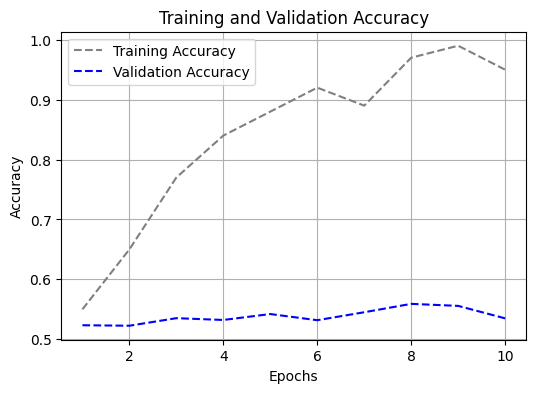

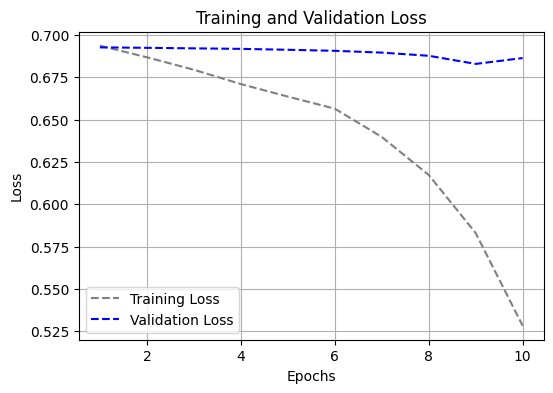

In [62]:
training_acc = training_outcome.history['accuracy']
validation_acc = training_outcome.history['val_accuracy']

training_loss = training_outcome.history["loss"]
validation_loss = training_outcome.history["val_loss"]

epoch_range_v7 = range(1, len(training_acc) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epoch_range_v7, training_acc, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epoch_range_v7, validation_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epoch_range_v7, training_loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epoch_range_v7, validation_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [65]:
from tensorflow.keras.models import load_model

model_v7 = load_model('best_model_v7.h5')

test_performance = model_v7.evaluate(train_data, train_labels)

print(f"Test Loss: {test_performance[0]:.3f}")
print(f"Test Accuracy: {test_performance[1]:.3f}")

4/4 [==============================] - 4s 39ms/step - loss: 0.5365 - accuracy: 0.9600
Test Loss: 0.537
Test Accuracy: 0.960


**PreTrained Models**

In [66]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  8780k      0  0:00:09  0:00:09 --:--:-- 14.3M


In [67]:
!rm -r aclImdb/train/unsup

In [71]:
import os

imdb_dir = '/content/aclImdb'
train_directory = os.path.join(imdb_directory, 'train')

document_labels = []
document_texts = []

for sentiment_label in ['neg', 'pos']:
    folder_name = os.path.join(train_directory, sentiment_label)
    for filename in os.listdir(folder_name):
        if filename[-4:] == '.txt':
            file = open(os.path.join(folder_name, filename))
            document_texts.append(file.read())
            file.close()
            if sentiment_label == 'neg':
                document_labels.append(0)
            else:
                document_labels.append(1)

In [73]:
print('No. of Samples', len(document_texts))

No. of Samples 25000


In [74]:
maxlen = 150
train_sample_count = 100
val_sample_count = 10000
max_vocab_size = 10000

text_tokenizer = Tokenizer(num_words=max_vocab_size)
text_tokenizer.fit_on_texts(document_texts)
text_sequences = text_tokenizer.texts_to_sequences(document_texts)

word_to_index = text_tokenizer.word_index
print('Found %s unique tokens.' % len(word_to_index))

text_data = pad_sequences(text_sequences, maxlen=maxlen)

document_labels = np.asarray(document_labels)
print('Shape of text data tensor:', text_data.shape)
print('Shape of document label tensor:', document_labels.shape)

data_indices = np.arange(text_data.shape[0])
np.random.shuffle(data_indices)
text_data = text_data[data_indices]
document_labels = document_labels[data_indices]

train_texts = text_data[:train_sample_count]
train_labels = document_labels[:train_sample_count]
val_texts = text_data[train_sample_count: train_sample_count + val_sample_count]
val_labels = document_labels[train_sample_count: train_sample_count + val_sample_count]


test_directory = os.path.join(imdb_dir, 'test')

test_labels = []
test_texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_directory, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), 'r') as f:
                test_texts.append(f.read())
            if label_type == 'neg':
                test_labels.append(0)
            else:
                test_labels.append(1)

test_sequences = text_tokenizer.texts_to_sequences(test_texts)
test_texts_padded = pad_sequences(test_sequences, maxlen=maxlen)[:5000]
test_labels_array = np.asarray(test_labels)[:5000]

Found 88582 unique tokens.
Shape of text data tensor: (25000, 150)
Shape of document label tensor: (25000,)


In [102]:
train_texts.shape

(100, 150)

In [76]:
val_texts.shape

(10000, 150)

In [77]:
test_texts_padded.shape

(5000, 150)

In [81]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-04-08 17:40:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-08 17:40:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-08 17:40:22--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [80]:
embedding_file_path = "glove.6B.100d.txt"

word_embeddings = {}
with open(embedding_file_path) as file:
    for line in file:
        word, coefficients = line.split(maxsplit=1)
        coefficients = np.fromstring(coefficients, "f", sep=" ")
        word_embeddings[word] = coefficients

print(f"Found {len(word_embeddings)} word vectors.")

Found 400000 word vectors.


In [86]:
vector_dim = 100

embedding_matrix = np.zeros((max_vocab_size , vector_dim))
for term, index in word_to_index.items():
    word_vector = word_embeddings.get(term)
    if index < max_vocab_size :
        if word_vector is not None:
            embedding_matrix[index] = word_vector

**Model 8:Pretrained Models with Training sample(100)**

In [89]:
model_architecture = Sequential()
model_architecture.add(Embedding(max_vocab_size, vector_dim, input_length=maxlen))
model_architecture.add(LSTM(32))
model_architecture.add(Dense(1, activation='sigmoid'))

model_architecture.layers[0].set_weights([embedding_matrix])
model_architecture.layers[0].trainable = False

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model_architecture.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_architecture.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_7 (LSTM)               (None, 32)                17024     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [96]:
callbacks = ModelCheckpoint(
            filepath="premodel1.keras",
            save_best_only=True,
            monitor="val_loss"
            )

training_model_1 = model_architecture.fit(train_data, train_labels,
                                          epochs=10,
                                          batch_size=32,
                                          validation_data=(val_data, val_labels),
                                          callbacks=[callbacks])

Epoch 1/10
4/4 [==============================] - 11s 4s/step - loss: 0.6831 - accuracy: 0.5900 - val_loss: 0.6958 - val_accuracy: 0.5026
Epoch 2/10
4/4 [==============================] - 11s 4s/step - loss: 0.6824 - accuracy: 0.6000 - val_loss: 0.6959 - val_accuracy: 0.5021
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.6816 - accuracy: 0.6000 - val_loss: 0.6960 - val_accuracy: 0.5009
Epoch 4/10
4/4 [==============================] - 5s 2s/step - loss: 0.6810 - accuracy: 0.6100 - val_loss: 0.6960 - val_accuracy: 0.5013
Epoch 5/10
4/4 [==============================] - 10s 3s/step - loss: 0.6802 - accuracy: 0.6200 - val_loss: 0.6960 - val_accuracy: 0.5024
Epoch 6/10
4/4 [==============================] - 5s 2s/step - loss: 0.6792 - accuracy: 0.6100 - val_loss: 0.6961 - val_accuracy: 0.5010
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.6786 - accuracy: 0.6400 - val_loss: 0.6965 - val_accuracy: 0.5035
Epoch 8/10
4/4 [======================

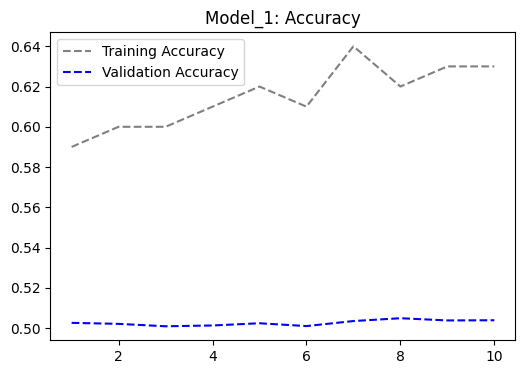

<Figure size 640x480 with 0 Axes>

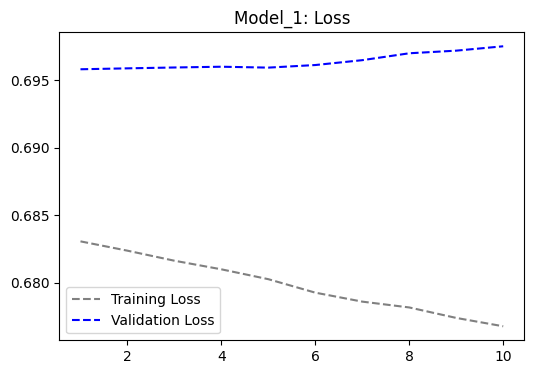

In [97]:
accuracy_1 = training_model_1.history['accuracy']
validation_accuracy_1 = training_model_1.history['val_accuracy']

training_loss_1 = training_model_1.history["loss"]
validation_loss_1 = training_model_1.history["val_loss"]

epochs_range_1 = range(1, len(accuracy_1) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs_range_1, accuracy_1, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs_range_1, validation_accuracy_1, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model_1: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs_range_1, training_loss_1, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs_range_1, validation_loss_1, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_1: Loss")
plt.legend()
plt.show()

In [99]:
loaded_model_1 = load_model('premodel1.keras')
model_1_results = loaded_model_1.evaluate(test_data_final, test_labels_final)

print(f'Loss: {model_1_results[0]:.3f}')
print(f'Accuracy: {model_1_results[1]:.3f}')

157/157 [==============================] - 4s 20ms/step - loss: 0.6957 - accuracy: 0.5084
Loss: 0.696
Accuracy: 0.508


**Model 9:Pretrained Models 4 LSTM hidden layers Training sample(5000)**

In [100]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example text data (replace with your actual data)
documents = ["This is the first text.", "Another example text.", "Text data for training."]
targets = [0, 1, 0]  # Example labels (replace with your actual labels)

# Parameters
max_sequence_length = 150
train_size = 5000
validation_size = 10000
max_vocab_size = 10000

# Tokenizer for text preprocessing
text_tokenizer = Tokenizer(num_words=max_vocab_size)
text_tokenizer.fit_on_texts(documents)  # Fit the tokenizer on your text data
document_sequences = text_tokenizer.texts_to_sequences(documents)

# Get word index
vocabulary_index = text_tokenizer.word_index
print(f'Found {len(vocabulary_index)} unique tokens.')

# Pad sequences to ensure uniform input length
padded_data = pad_sequences(document_sequences, maxlen=maxlen)

# Convert labels to numpy array
targets = np.asarray(targets)
print('Shape of data tensor:', padded_data.shape)
print('Shape of label tensor:', targets.shape)

# Shuffle the data and labels
shuffle_indices = np.arange(padded_data.shape[0])
np.random.shuffle(shuffle_indices)
padded_data = padded_data[shuffle_indices]
targets = targets[shuffle_indices]

# Split into training and validation sets
x_train = padded_data[:train_size]
y_train = targets[:train_size]
x_val = padded_data[train_size: train_size + validation_size]
y_val = targets[train_size: train_size + validation_size]

Found 10 unique tokens.
Shape of data tensor: (3, 150)
Shape of label tensor: (3,)


In [103]:
train_texts.shape

(100, 150)

In [104]:
val_texts.shape

(10000, 150)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras import optimizers
import numpy as np

vocab_size = 10000
embedding_dimension = 150
sequence_length = 150

embedding_matrix_data = np.random.rand(vocab_size, embedding_dimension)

new_model = Sequential()
new_model.add(Embedding(vocab_size, embedding_dimension, input_length=sequence_length))

new_model.add(LSTM(512, return_sequences=True))
new_model.add(Dropout(0.5))

new_model.add(LSTM(256, return_sequences=True))
new_model.add(Dropout(0.5))

new_model.add(LSTM(128, return_sequences=True))
new_model.add(Dropout(0.5))

new_model.add(LSTM(128))

new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(256, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(1, activation='sigmoid'))

new_model.layers[0].set_weights([embedding_matrix_data])
new_model.layers[0].trainable = False

adam_optimizer = optimizers.Adam(learning_rate=0.0001)
new_model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

new_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 150, 150)          1500000   
                                                                 
 lstm_8 (LSTM)               (None, 150, 512)          1357824   
                                                                 
 dropout_7 (Dropout)         (None, 150, 512)          0         
                                                                 
 lstm_9 (LSTM)               (None, 150, 256)          787456    
                                                                 
 dropout_8 (Dropout)         (None, 150, 256)          0         
                                                                 
 lstm_10 (LSTM)              (None, 150, 128)          197120    
                                                                 
 dropout_9 (Dropout)         (None, 150, 128)         

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath="new_model_v2.keras",
    save_best_only=True,
    monitor="val_loss"
)

training_results_v2 = new_model.fit(train_data,train_labels,
                                   epochs=10,
                                   batch_size=12,
                                   validation_data=(val_data, val_labels),
                                   callbacks=[checkpoint_callback])

Epoch 1/10
9/9 [==============================] - 356s 43s/step - loss: 0.7016 - accuracy: 0.4200 - val_loss: 0.6932 - val_accuracy: 0.4991
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.5300

In [ ]:
train_accuracy = training_results_v2.history['accuracy']
train_loss = training_results_v2.history['loss']
epoch_range = range(1, len(train_accuracy) + 1)

validation_accuracy = training_results_v2.history.get('val_accuracy', None)
validation_loss = training_results_v2.history.get('val_loss', None)

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
if validation_accuracy is not None:
    plt.plot(epoch_range, validation_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model_10: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epoch_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")
if validation_loss is not None:
    plt.plot(epoch_range, validation_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_10: Loss")
plt.legend()
plt.show()

In [ ]:
loaded_model_1 = load_model('premodel1.keras')
model_1_results = loaded_model_1.evaluate(test_data_final, test_labels_final)

print(f'Loss: {model_1_results[0]:.3f}')
print(f'Accuracy: {model_1_results[1]:.3f}')

**Model 10:Pretrained Models 2 LSTM hidden layer Training sample(15000)**

In [ ]:
max_sequence_length = 150
train_samples = 15000
val_samples = 10000
vocabulary_size = 10000

tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

padded_data = pad_sequences(sequences, maxlen=max_sequence_length)

labels_array = np.asarray(labels_data)
print('Shape of data tensor:', padded_data.shape)
print('Shape of label tensor:', labels_array.shape)

indices = np.arange(padded_data.shape[0])
np.random.shuffle(indices)
padded_data = padded_data[indices]
labels_array = labels_array[indices]

train_data = padded_data[:train_samples]
train_labels = labels_array[:train_samples]
val_data = padded_data[train_samples: train_samples + val_samples]
val_labels = labels_array[train_samples: train_samples + val_samples]

In [ ]:
train_data.shape

In [ ]:
validation_data.shape

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
import keras

vocabulary_size = 10000
embedding_size = 150
max_sequence_length = 150

embedding_weights = np.random.rand(vocabulary_size, embedding_size)

neural_network = Sequential()
neural_network.add(Embedding(vocabulary_size, embedding_size, input_length=max_sequence_length))

neural_network.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
neural_network.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

neural_network.add(Dense(64, activation='relu'))
neural_network.add(Dropout(0.5))
neural_network.add(Dense(1, activation='sigmoid'))

neural_network.layers[0].set_weights([embedding_weights])
neural_network.layers[0].trainable = False

adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)
neural_network.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
neural_network.summary()

In [ ]:
callbacks = ModelCheckpoint(
            filepath="premodel3.h5",
            save_best_only=True,
            monitor="val_loss"
            )

Pre_Model_3 = model.fit(train_data, train_labels,
                     epochs=10,
                     batch_size=12,
                     validation_data=(val_data, val_labels),
                     callbacks=callbacks)

In [ ]:
train_accuracy = Pre_Model_3.history['accuracy']
train_loss = Pre_Model_3.history['loss']
epochs_range = range(1, len(train_accuracy) + 1)

val_accuracy = Pre_Model_3.history.get('val_accuracy', None)
val_loss = Pre_Model_3.history.get('val_loss', None)

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
if val_accuracy is not None:
    plt.plot(epochs_range, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model_3: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs_range, train_loss, color="grey", linestyle="dashed", label="Training Loss")
if val_loss is not None:
    plt.plot(epochs_range, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_3: Loss")
plt.legend()
plt.show()